# 线性回归：TensorFlow方法

对于本脚本，我们介绍在TensorFlow中如何实现线性回归。

我们求解如下线性方程组：

$$ y = Ax + b$$

y是sepal长度以及x是petal宽度，均来自于Iris数据集。

相比前面的矩阵求逆和矩阵分解方法，用TensorFlow的分解方法求解线性回归问题是非常容易的（就是对用户而言，没有复杂的运算，但是对计算机而言，还是有许多计算的，这就是著名的BP算法）。

 1. 创建线性回归计算图输出。这意味着我们将接收一个输入$x$，并且生成输出$Ax + b$。
 2. 我们创建一个损失函数（L2损失），并且使用得到输出，然后用输出与期望输出的结果进行运算（指定学习速率来计算模型变量的参数，通过调整$A$和$b$来最小化损失值）。

使用TensorFlow的这种求解线性回归问题的方法，其优势在于可以处理不断增长的数据。当我们迭代优化的轮数越多的时候，回归的效果越好。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

Next we load the Iris data from the Scikit-Learn library.

In [3]:
# petal花瓣,sepal萼片。
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

对于大多数的TensorFlow算法，我们需要声明用于占位符的批尺寸，以及在计算图中的运算。这里我们设置批尺寸为25。我们将它设置为1到数据集大小之间的一个整数。

对于训练过程中的批尺寸大小的影响， 可以看下 [Ch2: 批训练和随机训练](https://github.com/nfmcclure/tensorflow_cookbook/tree/master/02_TensorFlow_Way/06_Working_with_Batch_and_Stochastic_Training)

In [4]:
# 声明批尺寸大小
batch_size = 25

In [5]:
# 初始化占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 为线性回归创建变量
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

添加模型运算（线性回归模型），以及L2损失函数。

In [6]:
# 声明模型运算
model_output = tf.add(tf.matmul(x_data, A), b)

# 声明损失（L2损失）
loss = tf.reduce_mean(tf.square(y_target - model_output))

我们需要告诉TensorFLow如何优化参数，也就是反向传播梯度。我们使用标准的梯度下降运算（`tf.train.GradientDescentOptimizer`），学习速率为$0.05$。

然后初始化模型。

In [8]:
# 声明优化器
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# 初始化变量
# init = tf.initialize_all_variables()
init = tf.global_variables_initializer()
sess.run(init)

进行100轮迭代训练

In [9]:
# Training loop
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[2.3244202]] b = [[2.703215]]
Loss = 1.5431076
Step #50 A = [[1.7575021]] b = [[3.4996626]]
Loss = 0.67293954
Step #75 A = [[1.3555768]] b = [[3.9777544]]
Loss = 0.5194696
Step #100 A = [[1.1956893]] b = [[4.312515]]
Loss = 0.3369614


输出最有参数，以及得到最优拟合曲线

In [10]:
# 得到最有参数
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# 得到最优拟合曲线
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

用Matplotlib画出结果。包括拟合曲线，以及画出训练过程中的L2损失。

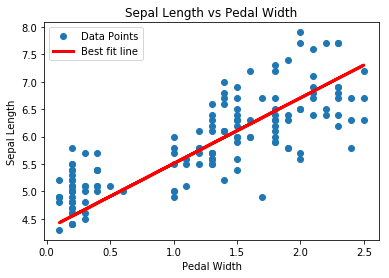

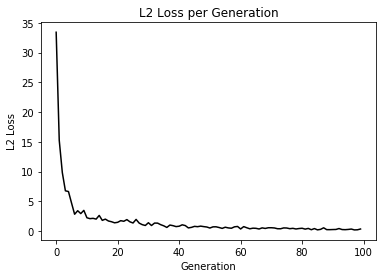

In [11]:
# 画出结果
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# 画出损失值
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()